### Functions for calculate distance between 2 coordenates and convert graphs from networkx to graphviz

In [1]:
import networkx as nx
import graphviz as gv
import heapq as hq 
from heapq import heappush as push, heappop as pop
import math 
def nxtogv(G, weighted=False, params={'rankdir': 'LR', 'size': '6'},
          path=None, pathparams={'color':'orangered', 'penwidth': '3'},
          nodeinfo=False):
  if G.is_directed():
    g = gv.Digraph('G')
    
  else:
    g = gv.Graph('G')
    
  g.attr(**params)

  for u in G.nodes:
    if nodeinfo:
      g.node(str(u), **dict(G.nodes[u]))
    else:
      g.node(str(u))

  for u, v in G.edges():
    if G.is_directed():
      pp = pathparams if path and path[v] == u else {}
    else:
      pp = pathparams if (path and path[v] == u) or (path and path[u] == v) else {}

    if weighted:
      g.edge(str(u), str(v), f"{G.edges[u, v]['weight']}", **pp)
    else:
      g.edge(str(u), str(v), **pp)
      
  return g

def distance(c1,c2):
  la1, lo1 = float(c1['LATITUD']), float(c1['LONGITUD'])
  la2, lo2 = float(c2['LATITUD']), float(c2['LONGITUD'])
  
  lo1, la1, lo2, la2 = map(math.radians, [lo1, la1, lo2, la2])
  dlo = lo2 - lo1
  dla = la2 - la1
  a = math.sin(dla/2)**2 + math.cos(la1) * math.cos(la2) * math.sin(dlo/2)**2
  c = 2 * math.asin(math.sqrt(a))
  r = 6371

  return round(c * r, 2)


Reading data from csv

In [2]:
import pandas as pd
import numpy as np

csvUrl="https://raw.githubusercontent.com/draul99/traveling_data/main/data.csv"

data = pd.read_csv(csvUrl)
pd.set_option('display.max_rows',None)
data

,DEPARTAMENTO,PROVINCIA,DISTRITO,CENTRO POBLADO,LATITUD,LONGITUD,NMI1,NMI2
0,AMAZONAS,BAGUA,ARAMANGO,EL MUYO (C.P.L.),-5.422545,-78.45299,311,1206
1,AMAZONAS,BAGUA,ARAMANGO,RESERVA UJUCANO,-5.427565,-78.444372,44,129
2,AMAZONAS,BAGUA,ARAMANGO,TUTUMBEROS,-5.327317,-78.44472,49,179
3,AMAZONAS,BAGUA,BAGUA,ALENYA BAJO,-5.682439,-78.495229,3,8
4,AMAZONAS,BONGARA,CUISPES,MITOPAMPA,-5.93856,-77.965302,1,4
5,AMAZONAS,BONGARA,JAZAN,NUEVA ESPERANZA,-5.935482,-77.976755,4,15
6,AMAZONAS,BONGARA,JAZAN,PEDRO RUIZ GALLO,-5.941387,-77.977098,1365,5361
7,AMAZONAS,BONGARA,JAZAN,PEDRO RUIZ,-5.94069,-77.97635,2,7
8,AMAZONAS,BONGARA,JAZAN,SAN JERONIMO,-5.95036,-77.97886,3,6
9,AMAZONAS,BONGARA,JAZAN,SANTA ROSA,-5.932149,-77.972108,1,5


In [3]:


def get_Data4Colum(ColumnKey, data):
  prov_names = data[ColumnKey].unique()
  print("Total",ColumnKey.lower()+"s","halladas: ", len(prov_names))
  return prov_names



name_provs=get_Data4Colum('PROVINCIA',data)
name_deps=get_Data4Colum('DEPARTAMENTO',data)
name_distr=get_Data4Colum('DISTRITO',data)
name_cp=get_Data4Colum('CENTRO POBLADO',data)





Total provincias halladas:  157
Total departamentos halladas:  25
Total distritos halladas:  570
Total centro poblados halladas:  3085


In [4]:
provinces = dict()
counter = 0
print('Poblated Center in each province\n' )
for name in name_provs:
  counter+=1
  provinces[name] = data[data['PROVINCIA']== name]
  print(name, len(provinces[name]))
print(counter)

Poblated Center in each province

BAGUA 4
BONGARA 8
CHACHAPOYAS 1
UTCUBAMBA 12
ANTONIO RAYMONDI 2
BOLOGNESI 5
CARHUAZ 20
CASMA 14
HUARAZ 38
HUARI 20
HUAYLAS 5
OCROS 2
POMABAMBA 21
RECUAY 28
SANTA 22
SIHUAS 6
YUNGAY 7
ABANCAY 41
ANDAHUAYLAS 8
ANTABAMBA 2
AYMARAES 23
CHINCHEROS 12
GRAU 1
AREQUIPA 24
CAMANA 16
CARAVELI 16
CASTILLA 1
CAYLLOMA 20
CONDESUYOS 3
CANGALLO 20
HUAMANGA 3
HUANCA SANCOS 38
HUANTA 7
LUCANAS 92
PARINACOCHAS 1
VICTOR FAJARDO 29
CAJABAMBA 10
CAJAMARCA 13
CELENDIN 16
CHOTA 6
CONTUMAZA 16
CUTERVO 6
JAEN 11
SAN IGNACIO 2
SAN MARCOS 2
SAN MIGUEL 13
SAN MIMGUEL 1
SANTA CRUZ 1
ACOMAYO 14
CALCA 3
CANAS 4
CANCHIS 12
CHUMBIVILCAS 3
LA CONVENCION 13
PARURO 14
QUISPICANCHI 22
PROVINCIA 1
CASTROVIRREYNA 49
CHURCAMPA 1
HUANCAVELICA 6
HUAYTARA 32
TAYACAJA 1
AMBO 37
DOS DE MAYO 7
DOSDEMAYO 1
HUAMALIES 6
HUANUCO SANTA 1
HUANUCO 27
LAURICOCHA 11
LEONCIO PRADO 28
MARAÑON 12
PUERTO INCA 9
CHINCHA 1
ICA 60
NASCA 6
PALPA 30
PISCO 14
CHANCHAMAYO 14
CHUPACA 13
CONCEPCION 1
HUANCAYO 13
JAUJA 

In [11]:
#@title Province
#@markdown Enter the province

no_type_checking = ''
name_province = 'BONGARA' #@param {type: "string"}

In [12]:
name_distritcs = provinces[name_province]['DISTRITO'].unique()
print('The districts of the ',name_province, 'province are ',len(name_distritcs), ':')
print(name_distritcs)

The districts of the  BONGARA province are  2 :
['CUISPES' 'JAZAN']


In [13]:
districts = dict()
for name in name_distritcs:
  districts[name]=provinces[name_province][provinces[name_province]['DISTRITO']==name]
  print(name,len(districts[name]))

CUISPES 1
JAZAN 7


POPULATIONS CENTERS OF SPECIFIC DISTRICT

In [14]:
#@title District
#@markdown Enter the district name
no_type_checking = ''
name_dist = 'JAZAN' #@param {type: "string"}

### Load Nodes and Edges from Data

In [15]:
district = districts[name_dist]
G = nx.Graph()
col = 'CENTRO POBLADO'
index = district.index[0]
for i, cp1 in district.iterrows():
    G.add_node(i, label=cp1[col])
for i, cp1 in district.iterrows():
    for j, cp2 in district.iterrows():
        if cp1[col] != cp2[col]: 
            G.add_edge(i, j, weight=distance(cp1, cp2))


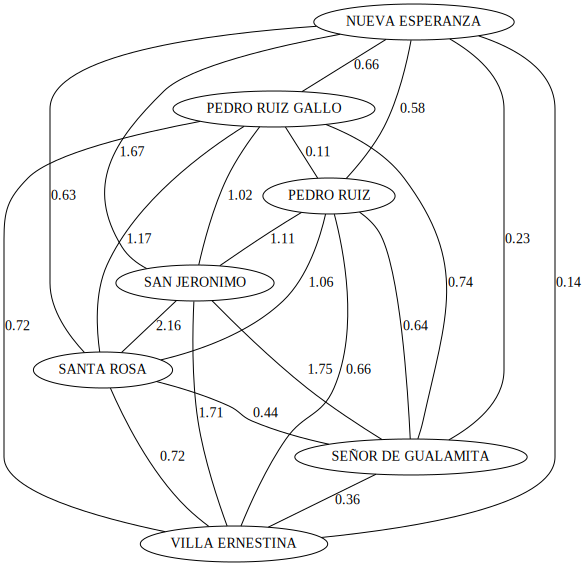

In [16]:
#@title Graph of population centers of 

nxtogv(G,nodeinfo=True, weighted=True, params={'size':'20'})


###Fuerza Bruta Algorithm

In [17]:
def menor(G,s):
  z = []
  for i in G.neighbors(s):
    x = G.edges[s,i]['weight']
    z.append(x)
    z.sort()
  return min(z)
  
def bruteforce(G, s):
  P = nx.Graph(G)
  L = nx.Graph(G)
  x = []
  queue = [s]
  camino = [s]
  for u in G.nodes:
    G.nodes[u]['visited'] = False
    G.nodes[u]['path'] = -1
  G.nodes[s]['visited'] = True
  while queue:
    u = queue[0]
    for v in G.neighbors(u):
      if not G.nodes[v]['visited'] and L.edges[u,v]['weight'] == menor(L,u):
        x.append(menor(L,u))
        G.nodes[v]['visited'] = True
        G.nodes[v]['path'] = u
        camino.append(v)
        queue.append(v)
    L.remove_node(queue[0])
    del queue[0]
  costo =sum(x)
  return camino, costo

###Depth-First Search Algorithm

In [ ]:
def _dfs(G, u, cam, sig):
    if not G.nodes[u]['visited']:
        min = math.inf
        G.nodes[u]['visited'] = True
        cam.append(u)
        for v in G.neighbors(u):
            for edge in G.edges(u):
                if v == edge[1] and G.edges[u, v]['weight'] < min and not G.nodes[v]['visited']:
                    min = G.edges[u, v]['weight']
                    sig = v
        if sig != u:
          G.nodes[sig]['path'] = u
          _dfs(G, sig, cam, sig)



def dfs(G, s):
    camino = []
    sig = s
    for u in G.nodes:
        G.nodes[u]['visited'] = False
        G.nodes[u]['path'] = -1
    _dfs(G, s, camino, sig)
    ultimo = camino[-1]
    print(f"El camino es el siguiente {camino}")
    return ultimo
